Impact Analytics Assignment

In [1]:
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
import numpy as np # linear algebra
import pandas as pd

%matplotlib inline

In [2]:
import sys
print(sys.version)

3.7.11 (default, Jul 27 2021, 09:42:29) [MSC v.1916 64 bit (AMD64)]


In [3]:
import seaborn as sns
import os
import gc
import sys
import json
import random
from pathlib import Path

In [4]:
import cv2 # CV2 for image manipulation
from tqdm import tqdm
#from sklearn.model_selection import StratifiedKFold, KFold
#from imgaug import augmenters as iaa

In [67]:
with open('imaterialist-fashion-2020-fgvc7/label_descriptions.json', 'r') as file:
    label_desc = json.load(file)
train_df = pd.read_csv('imaterialist-fashion-2020-fgvc7/train.csv')

In [7]:
train_df.keys()

Index(['ImageId', 'EncodedPixels', 'Height', 'Width', 'ClassId',
       'AttributesIds'],
      dtype='object')

In [10]:
train_df.loc[:30]

ImageId  \
0   00000663ed1ff0c4e0132b9b9ac53f6e   
1   00000663ed1ff0c4e0132b9b9ac53f6e   
2   00000663ed1ff0c4e0132b9b9ac53f6e   
3   00000663ed1ff0c4e0132b9b9ac53f6e   
4   00000663ed1ff0c4e0132b9b9ac53f6e   
5   00000663ed1ff0c4e0132b9b9ac53f6e   
6   00000663ed1ff0c4e0132b9b9ac53f6e   
7   00000663ed1ff0c4e0132b9b9ac53f6e   
8   00000663ed1ff0c4e0132b9b9ac53f6e   
9   0000fe7c9191fba733c8a69cfaf962b7   
10  0000fe7c9191fba733c8a69cfaf962b7   
11  0002ec21ddb8477e98b2cbb87ea2e269   
12  0002ec21ddb8477e98b2cbb87ea2e269   
13  0002ec21ddb8477e98b2cbb87ea2e269   
14  0002ec21ddb8477e98b2cbb87ea2e269   
15  0002f5a0ebc162ecfb73e2c91e3b8f62   
16  0002f5a0ebc162ecfb73e2c91e3b8f62   
17  0002f5a0ebc162ecfb73e2c91e3b8f62   
18  0004467156e47b0eb6de4aa6479cbd15   
19  0004467156e47b0eb6de4aa6479cbd15   
20  0004467156e47b0eb6de4aa6479cbd15   
21  0004467156e47b0eb6de4aa6479cbd15   
22  0004467156e47b0eb6de4aa6479cbd15   
23  00048c3a2fb9c29340473c4cfc06424a   
24  00048c3a2fb9c29340473c4cfc06424a   
25  00048c3a2fb9c29340473c4cfc06424a   
26  00048c3a2fb9c29340473c4cfc06424a   
27  00048c3a2fb9c29340473c4cfc06424a   
28  00048c3a2fb9c29340473c4cfc06424a   
29  00048c3a2fb9c29340473c4cfc06424a   
30  00048c3a2fb9c29340473c4cfc06424a   

                                        EncodedPixels  Height  Width  ClassId  \
0   6068157 7 6073371 20 6078584 34 6083797 48 608...    5214   3676        6   
1   6323163 11 6328356 32 6333549 53 6338742 75 63...    5214   3676        0   
2   8521389 10 8526585 30 8531789 42 8537002 46 85...    5214   3676       28   
3   12903854 2 12909064 7 12914275 10 12919485 15 ...    5214   3676       31   
4   10837337 5 10842542 14 10847746 24 10852951 33...    5214   3676       32   
5   11464158 10 11469372 30 11474586 43 11479800 4...    5214   3676       32   
6   5910568 31 5915775 65 5920982 69 5926189 73 59...    5214   3676       31   
7   6421446 292 6426657 298 6431867 305 6437078 31...    5214   3676       29   
8   4566382 8 4571592 25 4576803 41 4582013 58 458...    5214   3676        4   
9   2201176 1 2203623 3 2206071 5 2208518 8 221096...    2448   2448       33   
10  1343707 9 1346138 27 1348569 44 1351000 62 135...    2448   2448        1   
11  2673735 2 2676734 8 2679734 13 2682733 19 2685...    3000   1997       33   
12  2287509 4 2290504 12 2290588 26 2293501 18 229...    3000   1997       10   
13  3077799 43 3080792 52 3083786 60 3086779 70 30...    3000   1997       23   
14  2678617 8 2681610 18 2684607 25 2687605 31 269...    3000   1997       23   
15  435 132 1002 132 1569 132 2136 132 2703 132 32...     567    400       10   
16  107288 1 107854 3 108421 2 108987 3 109554 2 1...     567    400       33   
17  133262 2 133826 4 134390 6 134956 7 135522 7 1...     567    400       15   
18  132663 8 133396 25 134130 41 134868 53 135611 ...     750    500       10   
19  186967 3 187712 9 188457 15 189202 22 189950 2...     750    500       33   
20  241830 6 242576 16 243321 24 244066 29 244811 ...     750    500       31   
21  152573 1 153321 4 154069 7 154818 9 155566 12 ...     750    500       31   
22  192100 1 192849 4 193598 4 194347 4 195097 4 1...     750    500       15   
23  239016 3 239989 6 240963 7 241938 8 242913 9 2...     975    650       13   
24  257702 10 258670 26 259640 36 260572 6 260610 ...     975    650        1   
25  277152 1 278126 3 279102 2 280078 2 281053 3 2...     975    650       33   
26  249119 32 250083 44 251048 55 252016 64 252096...     975    650        8   
27  269630 2 270602 6 271574 9 272547 12 273519 14...     975    650       35   
28  352197 3 353172 8 354146 12 355121 15 356096 1...     975    650       24   
29  329326 3 330300 8 331276 12 332253 15 333231 1...     975    650       23   
30  283509 4 284484 10 284549 2 285459 12 285520 7...     975    650       23   

                          AttributesIds  
0       115,136,143,154,230,295,316,317  
1       115,136,142,146,225,295,316,317  
2                            

In [9]:
print(f'Shape of training dataset: {train_df.shape}')

Shape of training dataset: (333401, 6)


We can oobserve that same image id is getting repeated many times

In [11]:
Unique_ImageId = set(train_df["ImageId"])

In [12]:
print(f"There are {len(train_df)} unique record in train.csv." )
print(f"There are {len(Unique_ImageId)} unique data." )

There are 333401 unique record in train.csv.
There are 45623 unique data.


Image size analysis in training dataset

In [17]:
pd.DataFrame([train_df['Height'].describe(), train_df['Width'].describe()])

count         mean          std    min     25%     50%     75%  \
Height  333401.0  2235.524021  1543.320481  296.0  1024.0  1600.0  3000.0   
Width   333401.0  1761.979250  1425.540390  151.0   720.0  1200.0  2275.0   

            max  
Height   8688.0  
Width   10717.0

In [18]:
pd.DataFrame([train_df['Height'].describe(), train_df['Width'].describe()]).T.loc[['max', 'min', 'mean']]

Height        Width
max   8688.000000  10717.00000
min    296.000000    151.00000
mean  2235.524021   1761.97925

# Height and Width destribution of training images

C:\Users\Lenovo\anaconda3\envs\nd\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


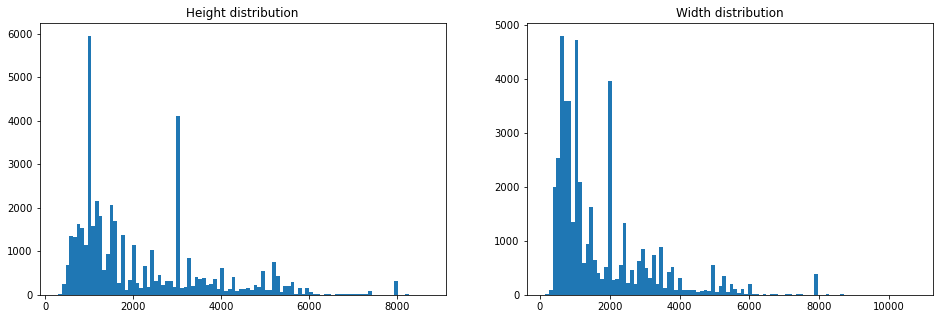

In [19]:
image_shape_df = train_df.groupby("ImageId")["Height", "Width"].first()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
ax1.hist(image_shape_df['Height'], bins=100)
ax1.set_title("Height distribution")
ax2.hist(image_shape_df['Width'], bins=100)
ax2.set_title("Width distribution")
plt.show()


In both height and width distribution we can say there are hardly any data points after 6000

<AxesSubplot:xlabel='Width', ylabel='Height'>

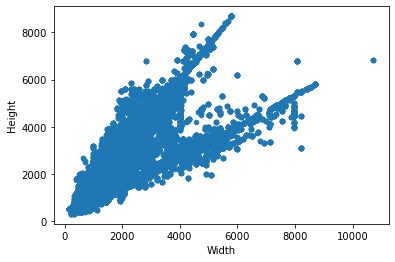

In [20]:
train_df.plot.scatter(x = "Width", y = "Height")

Clearly the aspect ratio of the most of the images also lies in the well defined range

# Image with minimum height

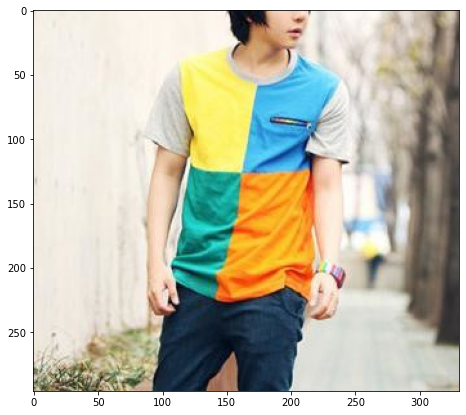

In [22]:
plt.figure(figsize = (70,7))
min_height = list(set(train_df[train_df['Height'] == train_df['Height'].min()]['ImageId']))[0]
plt.imshow(mpimg.imread(f'imaterialist-fashion-2020-fgvc7/train/{min_height}.jpg'))
plt.grid(False)
plt.show()

# Image with maximum height

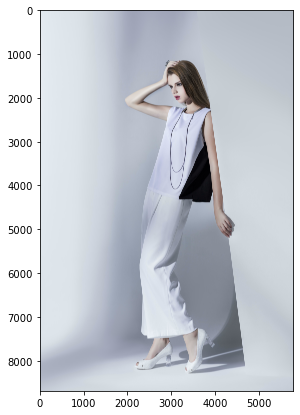

In [26]:
plt.figure(figsize = (70,7))
max_height = list(set(train_df[train_df['Height'] == train_df['Height'].max()]['ImageId']))[0]
plt.imshow(mpimg.imread(f'imaterialist-fashion-2020-fgvc7/train/{max_height}.jpg'))
plt.grid(False)
plt.show()


# Image with minimum width

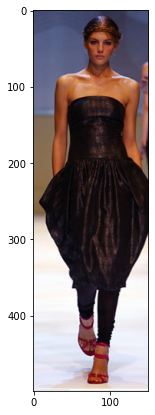

In [27]:
plt.figure(figsize = (70,7))
min_width = list(set(train_df[train_df['Width'] == train_df['Width'].min()]['ImageId']))[0]
plt.imshow(mpimg.imread(f'imaterialist-fashion-2020-fgvc7/train/{min_width}.jpg'))
plt.grid(False)
plt.show()

# Image with max width

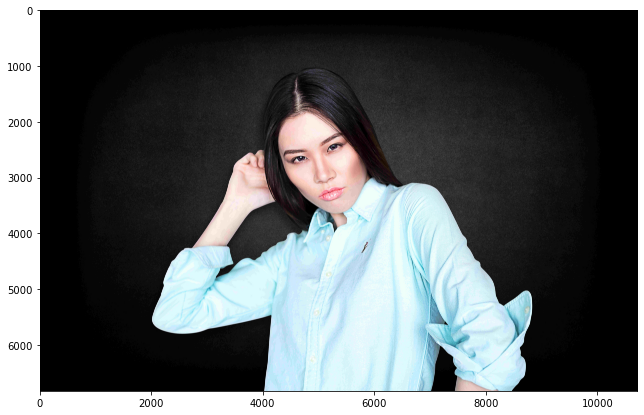

In [28]:
plt.figure(figsize = (70,7))
max_width = list(set(train_df[train_df['Width'] == train_df['Width'].max()]['ImageId']))[0]
plt.imshow(mpimg.imread(f'imaterialist-fashion-2020-fgvc7/train/{max_width}.jpg'))
plt.grid(False)
plt.show()

In [29]:
area_df = pd.DataFrame()
area_df['ImageId'] = train_df['ImageId']
area_df['area'] = train_df['Height'] * train_df['Width']
min_area = list(set(area_df[area_df['area'] == area_df['area'].min()]['ImageId']))[0]
max_area = list(set(area_df[area_df['area'] == area_df['area'].max()]['ImageId']))[0]

# Image with minimum area

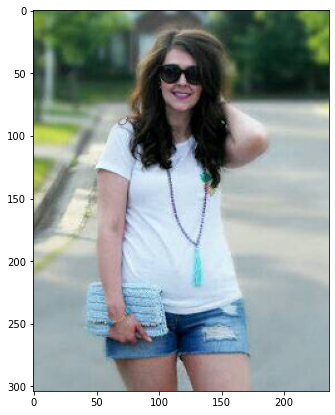

In [31]:
plt.figure(figsize = (70,7))
plt.imshow(mpimg.imread(f'imaterialist-fashion-2020-fgvc7/train/{min_area}.jpg'))
plt.grid(False)
plt.show()

# Image with maximum area

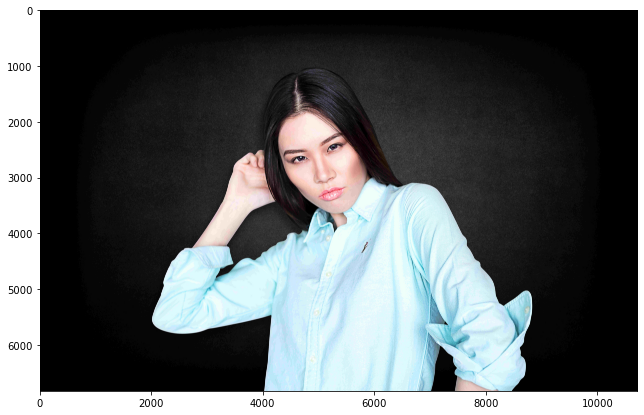

In [32]:
plt.figure(figsize = (70,7))
plt.imshow(mpimg.imread(f'imaterialist-fashion-2020-fgvc7/train/{max_area}.jpg'))
plt.grid(False)
plt.show()

# Details about Classes and Attributes

In [33]:
num_classes = len(label_desc['categories'])
num_attributes = len(label_desc['attributes'])
print(f'Total # of classes: {num_classes}')
print(f'Total # of attributes: {num_attributes}')

Total # of classes: 46
Total # of attributes: 294


In [34]:
type(label_desc)

dict

In [35]:
categories_df = pd.DataFrame(label_desc['categories'])
attributes_df = pd.DataFrame(label_desc['attributes'])
categories_df

id                                     name   supercategory  level
0    0                            shirt, blouse       upperbody      2
1    1                 top, t-shirt, sweatshirt       upperbody      2
2    2                                  sweater       upperbody      2
3    3                                 cardigan       upperbody      2
4    4                                   jacket       upperbody      2
5    5                                     vest       upperbody      2
6    6                                    pants       lowerbody      2
7    7                                   shorts       lowerbody      2
8    8                                    skirt       lowerbody      2
9    9                                     coat       wholebody      2
10  10                                    dress       wholebody      2
11  11                                 jumpsuit       wholebody      2
12  12                                     cape       wholebody      2
13  13                                  glasses            head      2
14  14                                      hat            head      2
15  15  headband, head covering, hair accessory            head      2
16  16                                      tie            neck      2
17  17                                    glove  arms and hands      2
18  18                                    watch  arms and hands      2
19  19                                     belt           waist      2
20  20                               leg warmer   legs and feet      2
21  21                        tights, stockings   legs and feet      2
22  22                                     sock   legs and feet      2
23  23                                     shoe   legs and feet      2
24  24                              bag, wallet          others      2
25  25                                    scarf          others      2
26  26                                 umbrella          others      2
27  27                                     hood   garment parts      2
28  28                                   collar   garment parts      2
29  29                                    lapel   garment parts      2
30  30                                epaulette   garment parts      2
31  31                                   sleeve   garment parts      2
32  32                                   pocket   garment parts      2
33  33                                 neckline   garment parts      2
34  34                                   buckle        closures      2
35  35                                   zipper        closures      2
36  36                                 applique     decorations      2
37  37                                     bead     decorations      2
38  38                                      bow     decorations      2
39  39                                   flower     decorations      2
40  40                                   fringe     decorations      2
41  41                                   ribbon     decorations      2
42  42                                    rivet     decorations      2
43  43                                   ruffle     decorations      2
44  44                                   sequin     decorations      2
45  45                                   tassel     decorations      2

In [36]:
pd.set_option('display.max_rows', 300)
attributes_df

id                                name  \
0      0                   classic (t-shirt)   
1      1                        polo (shirt)   
2      2                          undershirt   
3      3                      henley (shirt)   
4      4                    ringer (t-shirt)   
5      5                    raglan (t-shirt)   
6      6                       rugby (shirt)   
7      7                      sailor (shirt)   
8      8                          crop (top)   
9      9                        halter (top)   
10    10                            camisole   
11    11                          tank (top)   
12    12                       peasant (top)   
13    13                          tube (top)   
14    14                         tunic (top)   
15    15                         smock (top)   
16    16                              hoodie   
17    17                              blazer   
18    18                        pea (jacket)   
19    19                     puffer (jacket)   
20    20                      biker (jacket)   
21    21                    trucker (jacket)   
22    22                     bomber (jacket)   
23    23                              anorak   
24    24                     safari (jacket)   
25    25                        mao (jacket)   
26    26                      nehru (jacket)   
27    27                    norfolk (jacket)   
28    28           classic military (jacket)   
29    29                      track (jacket)   
30    30                         windbreaker   
31    31                     chanel (jacket)   
32    32                              bolero   
33    33                     tuxedo (jacket)   
34    34                    varsity (jacket)   
35    35                       crop (jacket)   
36    36                               jeans   
37    37                          sweatpants   
38    38                            leggings   
39    39                 hip-huggers (pants)   
40    40                       cargo (pants)   
41    41                            culottes   
42    42                       capri (pants)   
43    43                       harem (pants)   
44    44                      sailor (pants)   
45    45                             jodhpur   
46    46                         peg (pants)   
47    47                        camo (pants)   
48    48                       track (pants)   
49    49                        crop (pants)   
50    50                      short (shorts)   
51    51                      booty (shorts)   
52    52                    bermuda (shorts)   
53    53                      cargo (shorts)   
54    54                              trunks   
55    55                         boardshorts   
56    56                               skort   
57    57                    roll-up (shorts)   
58    58                     tie-up (shorts)   
59    59                    culotte (shorts)   
60    60                     lounge (shorts)   
61    61                            bloomers   
62    62                        tutu (skirt)   
63    63                                kilt   
64    64                        wrap (skirt)   
65    65                      skater (skirt)   
66    66                       cargo (skirt)   
67    67                      hobble (skirt)   
68    68                      sheath (skirt)   
69    69                   ball gown (skirt)   
70    70                       gypsy (skirt)   
71    71                     rah-rah (skirt)   
72    72                     prairie (skirt)   
73    73                    flamenco (skirt)   
74    74                   accordion (skirt)   
75    75                      sarong (skirt)   
76    76                       tulip (skirt)   
77    77                      dirndl (skirt)   
78    78                       godet (skirt)   
79    79                      blanket (coat)   
80    80                               parka   
81    81                       trench (coat)   
82    82              

# Plotting a few training images without any masks

In [39]:
def plot_images(size=12, figsize=(12, 12)):
    # First get some images to be plotted
    image_ids = train_df['ImageId'].unique()[:12]
    images=[]
    
    for image in image_ids:
        images.append(mpimg.imread(f'imaterialist-fashion-2020-fgvc7/train/{image}.jpg'))
    
    # Plot images in groups of 4 images
    n_groups = 4
    
    count = 0
    for index in range(size // 4):
        fig, ax = plt.subplots(nrows=2, ncols=2, figsize=figsize)
        for row in ax:
            for col in row:
                col.imshow(images[count])
                col.axis('off')
                count += 1
        plt.show()
    gc.collect()

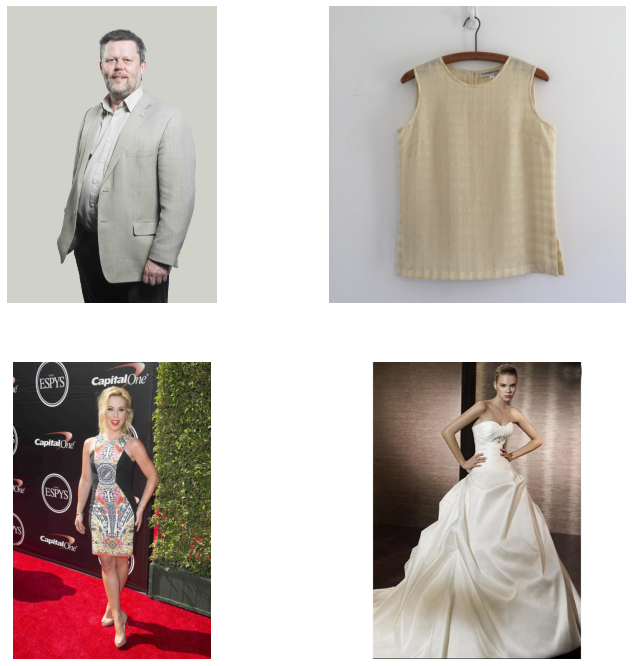

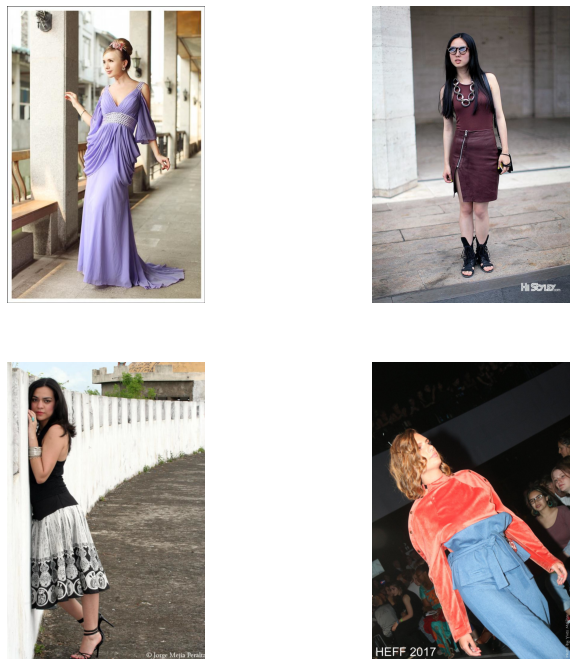

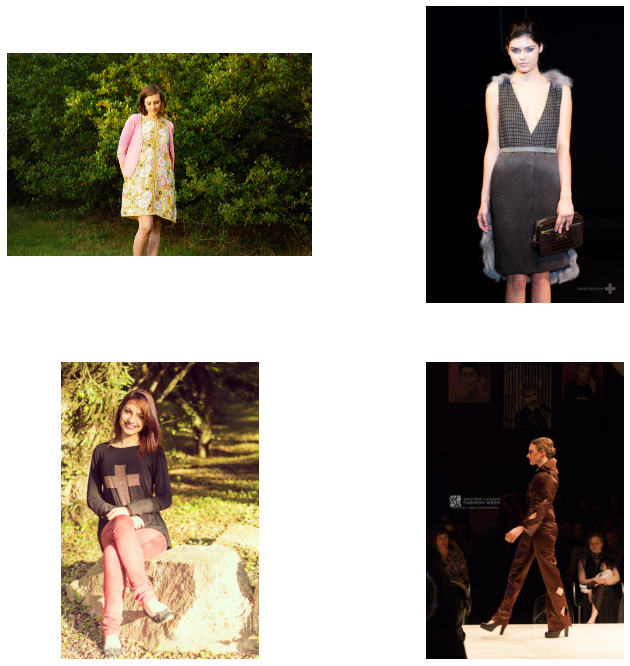

In [40]:
plot_images()

# Plotting a few images with given segments

In [58]:
image_ids = train_df['ImageId'].unique()[:12]
print(image_ids)
print(type(image_ids))
images_meta=[]
print(len(list(train_df[train_df['ImageId'] == '00000663ed1ff0c4e0132b9b9ac53f6e']['EncodedPixels'])))
print(list(train_df[train_df['ImageId'] == '00000663ed1ff0c4e0132b9b9ac53f6e']['ClassId']))
image_id = '00000663ed1ff0c4e0132b9b9ac53f6e'
img = mpimg.imread(f'imaterialist-fashion-2020-fgvc7/train/{image_id}.jpg')
print(img.shape)
mask = np.zeros((5214, 3676)).reshape(-1)
print(mask.shape)

['00000663ed1ff0c4e0132b9b9ac53f6e' '0000fe7c9191fba733c8a69cfaf962b7'
 '0002ec21ddb8477e98b2cbb87ea2e269' '0002f5a0ebc162ecfb73e2c91e3b8f62'
 '0004467156e47b0eb6de4aa6479cbd15' '00048c3a2fb9c29340473c4cfc06424a'
 '0006ea84499fd9a06fefbdf47a5eb4c0' '000775b6b5e27b011dc8bba2d7b85211'
 '000aac3870ea7c59ca0333ffa5327323' '000b3a87508b0fa185fbd53ecbe2e4c6'
 '000b3ec2c6eaffb491a5abb72c2e3e26' '000c5bb8ca785bce8d00e3a6c7802a8c']
<class 'numpy.ndarray'>
9
[6, 0, 28, 31, 32, 32, 31, 29, 4]
(5214, 3676, 3)
(19166664,)


In [45]:
def create_mask(size):
    image_ids = train_df['ImageId'].unique()[:size]
    images_meta=[]

    for image_id in image_ids:
        img = mpimg.imread(f'imaterialist-fashion-2020-fgvc7/train/{image_id}.jpg')
        images_meta.append({
            'image': img,
            'shape': img.shape,
            'encoded_pixels': train_df[train_df['ImageId'] == image_id]['EncodedPixels'],
            'class_ids':  train_df[train_df['ImageId'] == image_id]['ClassId']
        })

    masks = []
    for image in images_meta:
        shape = image.get('shape')
        encoded_pixels = list(image.get('encoded_pixels'))
        class_ids = list(image.get('class_ids'))
        
        # Initialize numpy array with shape same as image size
        height, width = shape[:2]
        mask = np.zeros((height, width)).reshape(-1)
        
        # Iterate over encoded pixels and create mask
        for segment, (pixel_str, class_id) in enumerate(zip(encoded_pixels, class_ids)):
            splitted_pixels = list(map(int, pixel_str.split()))
            pixel_starts = splitted_pixels[::2]
            run_lengths = splitted_pixels[1::2]
            assert max(pixel_starts) < mask.shape[0]
            for pixel_start, run_length in zip(pixel_starts, run_lengths):
                pixel_start = int(pixel_start) - 1
                run_length = int(run_length)
                mask[pixel_start:pixel_start+run_length] = 255 - class_id * 4
        masks.append(mask.reshape((height, width), order='F'))  # https://stackoverflow.com/questions/45973722/how-does-numpy-reshape-with-order-f-work
    return masks, images_meta

In [46]:
def plot_segmented_images(size=12, figsize=(14, 14)):
    # First create masks from given segments
    masks, images_meta = create_mask(size)
    
    # Plot images in groups of 4 images
    n_groups = 4
    
    count = 0
    for index in range(size // 4):
        fig, ax = plt.subplots(nrows=2, ncols=2, figsize=figsize)
        for row in ax:
            for col in row:
                col.imshow(images_meta[count]['image'])
                col.imshow(masks[count], alpha=0.75)
                col.axis('off')
                count += 1
        plt.show()
    gc.collect()

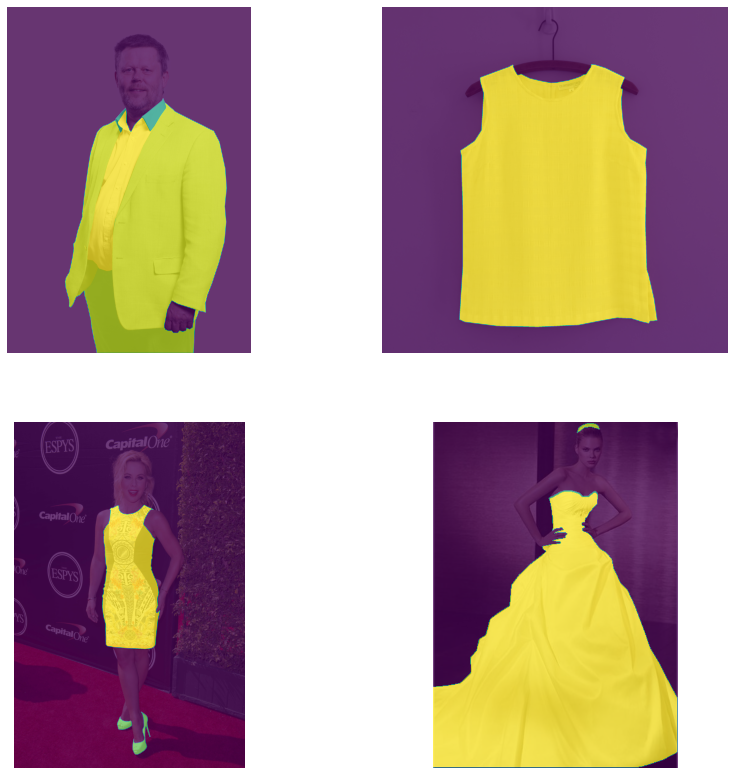

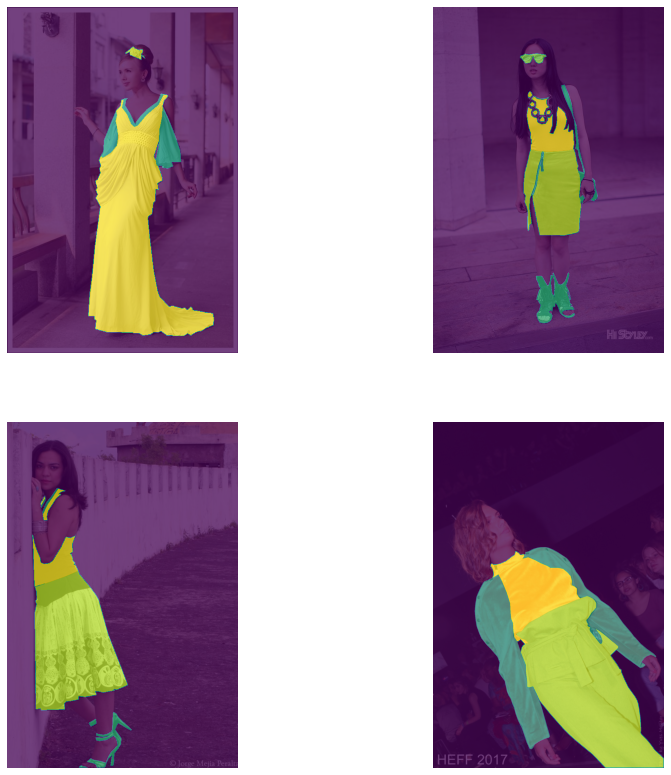

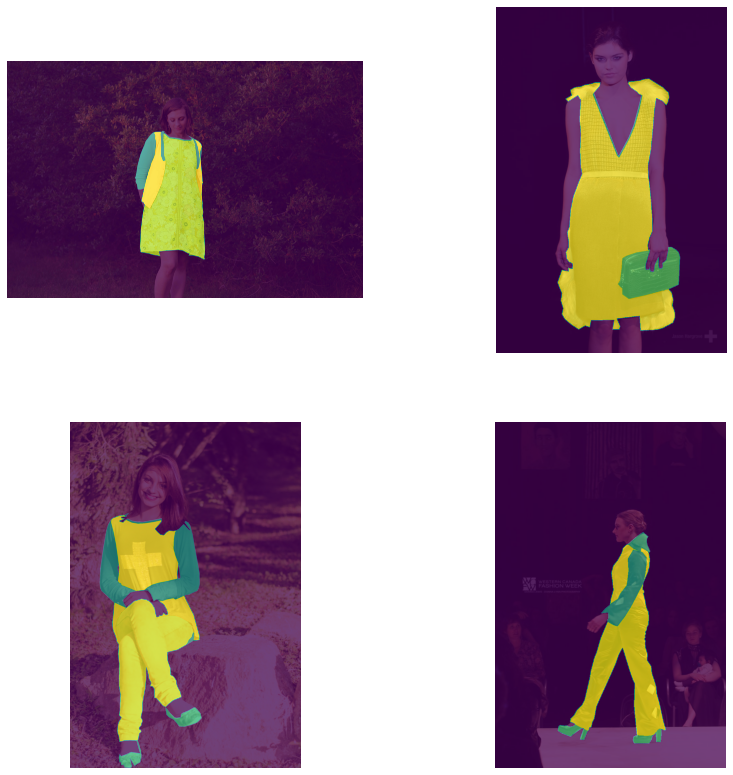

In [47]:
plot_segmented_images()

# Analysing Categories and Attributes

In [59]:
categories_df = pd.DataFrame(label_desc.get('categories'))
attributes_df = pd.DataFrame(label_desc.get('attributes'))

In [60]:
print(f'# of categories: {len(categories_df)}')
print(f'# of attributes: {len(attributes_df)}')

# of categories: 46
# of attributes: 294


So there are 46 categories (classes) and 294 attributes. Let's see some of the categories and attributes

In [61]:
categories_df.head()

id                      name supercategory  level
0   0             shirt, blouse     upperbody      2
1   1  top, t-shirt, sweatshirt     upperbody      2
2   2                   sweater     upperbody      2
3   3                  cardigan     upperbody      2
4   4                    jacket     upperbody      2

In [62]:
attributes_df.head()

id               name supercategory  level
0   0  classic (t-shirt)      nickname      1
1   1       polo (shirt)      nickname      1
2   2         undershirt      nickname      1
3   3     henley (shirt)      nickname      1
4   4   ringer (t-shirt)      nickname      1

In [63]:
category_map, attribute_map = {}, {}
for cat in label_desc.get('categories'):
    category_map[cat.get('id')] = cat.get('name')
for attr in label_desc.get('attributes'):
    attribute_map[attr.get('id')] = attr.get('name')

In [68]:
train_df['ClassId'] = train_df['ClassId'].map(category_map)
train_df['ClassId'] = train_df['ClassId'].astype('category')
train_df

ImageId  \
0       00000663ed1ff0c4e0132b9b9ac53f6e   
1       00000663ed1ff0c4e0132b9b9ac53f6e   
2       00000663ed1ff0c4e0132b9b9ac53f6e   
3       00000663ed1ff0c4e0132b9b9ac53f6e   
4       00000663ed1ff0c4e0132b9b9ac53f6e   
...                                  ...   
333396  fffe20b555b98c3c1f26c8dfff275cbc   
333397  ffffbf7014a9e408bfbb81a75bc70638   
333398  ffffbf7014a9e408bfbb81a75bc70638   
333399  ffffbf7014a9e408bfbb81a75bc70638   
333400  ffffbf7014a9e408bfbb81a75bc70638   

                                            EncodedPixels  Height  Width  \
0       6068157 7 6073371 20 6078584 34 6083797 48 608...    5214   3676   
1       6323163 11 6328356 32 6333549 53 6338742 75 63...    5214   3676   
2       8521389 10 8526585 30 8531789 42 8537002 46 85...    5214   3676   
3       12903854 2 12909064 7 12914275 10 12919485 15 ...    5214   3676   
4       10837337 5 10842542 14 10847746 24 10852951 33...    5214   3676   
...                                                   ...     ...    ...   
333396  2712731 8 2715725 23 2718719 39 2721713 55 272...    3000   2001   
333397  71179 1 71678 3 72178 4 72678 4 73178 5 73679 ...     500    375   
333398  116648 5 117148 16 117648 22 118148 26 118647 ...     500    375   
333399  67711 1 68210 1 68709 2 69204 2 69208 3 69705 ...     500    375   
333400  63365 36 63852 77 64343 85 64838 89 65332 94 6...     500    375   

              ClassId                    AttributesIds  
0               pants  115,136,143,154,230,295,316,317  
1       shirt, blouse  115,136,142,146,225,295,316,317  
2              collar                              163  
3              sleeve                          160,204  
4              pocket                              219  
...               ...                              ...  
333396         collar                              163  
333397       neckline                              NaN  
333398         sleeve                              157  
333399         sleeve                              157  
333400          dress      102,128,142,150,295,308,317  

[333401 rows x 6 columns]

# Let's see the class wise distribution of segments in training dataset

C:\Users\Lenovo\anaconda3\envs\nd\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


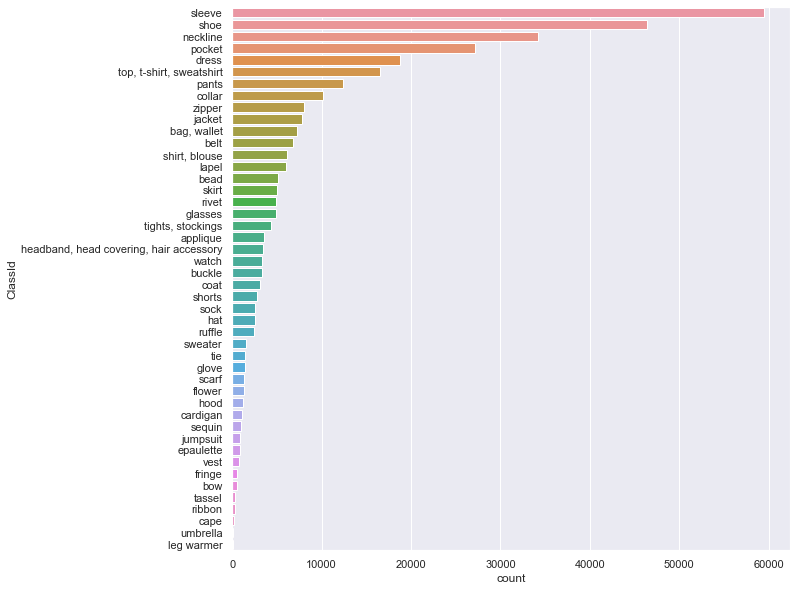

In [69]:
sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize = (10,10))
sns.countplot(y='ClassId',data=train_df , ax=ax, order = train_df['ClassId'].value_counts().index)
fig.show()

# Now let's visualize an image with all its classes and attributes

In [71]:
IMAGE_ID = '000b3ec2c6eaffb491a5abb72c2e3e26'

In [72]:
# Get the an image id given in the training set for visualization
vis_df = train_df[train_df['ImageId'] == IMAGE_ID]
vis_df['ClassId'] = vis_df['ClassId'].cat.codes
vis_df = vis_df.reset_index(drop=True)
vis_df

C:\Users\Lenovo\anaconda3\envs\nd\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


ImageId  \
0  000b3ec2c6eaffb491a5abb72c2e3e26   
1  000b3ec2c6eaffb491a5abb72c2e3e26   
2  000b3ec2c6eaffb491a5abb72c2e3e26   
3  000b3ec2c6eaffb491a5abb72c2e3e26   
4  000b3ec2c6eaffb491a5abb72c2e3e26   
5  000b3ec2c6eaffb491a5abb72c2e3e26   
6  000b3ec2c6eaffb491a5abb72c2e3e26   
7  000b3ec2c6eaffb491a5abb72c2e3e26   

                                       EncodedPixels  Height  Width  ClassId  \
0  752989 6 755294 19 757599 31 759904 44 762209 ...    2310   1536       32   
1  1468756 2 1471067 9 1473378 15 1475689 21 1478...    2310   1536       32   
2  701292 5 703597 15 705903 25 708209 34 710515 ...    2310   1536       24   
3  458445 17 460731 51 463017 85 465303 115 46759...    2310   1536       41   
4  1787118 1 1789427 1 1791735 3 1794044 3 179635...    2310   1536       25   
5  1139954 1 1142264 1 1144573 2 1146882 3 114919...    2310   1536       35   
6  458445 17 460731 51 463017 85 465303 115 46759...    2310   1536       35   
7  839153 2 841462 6 843771 10 846081 12 848390 1...    2310   1536       23   

                   AttributesIds  
0                            NaN  
1                            NaN  
2    115,135,154,230,295,316,317  
3  0,115,136,145,147,295,314,317  
4                            218  
5                        160,204  
6                        160,204  
7                            190

From above table, this image has 8 segmentes and a few attributes. Let's visualize all of them!

# Let's first the plot the plain image

[]

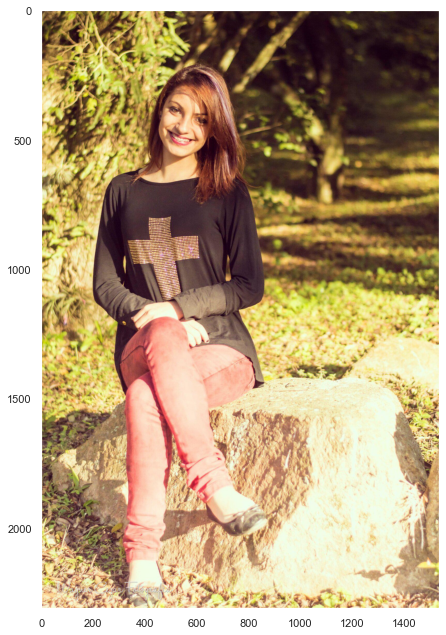

In [73]:
plt.figure(figsize = (110,11))
image = mpimg.imread(f'imaterialist-fashion-2020-fgvc7/train/{IMAGE_ID}.jpg')
plt.grid(False)
plt.imshow(image)
plt.plot()

In [74]:
train_df[train_df['ImageId'] == IMAGE_ID]

ImageId  \
51  000b3ec2c6eaffb491a5abb72c2e3e26   
52  000b3ec2c6eaffb491a5abb72c2e3e26   
53  000b3ec2c6eaffb491a5abb72c2e3e26   
54  000b3ec2c6eaffb491a5abb72c2e3e26   
55  000b3ec2c6eaffb491a5abb72c2e3e26   
56  000b3ec2c6eaffb491a5abb72c2e3e26   
57  000b3ec2c6eaffb491a5abb72c2e3e26   
58  000b3ec2c6eaffb491a5abb72c2e3e26   

                                        EncodedPixels  Height  Width  \
51  752989 6 755294 19 757599 31 759904 44 762209 ...    2310   1536   
52  1468756 2 1471067 9 1473378 15 1475689 21 1478...    2310   1536   
53  701292 5 703597 15 705903 25 708209 34 710515 ...    2310   1536   
54  458445 17 460731 51 463017 85 465303 115 46759...    2310   1536   
55  1787118 1 1789427 1 1791735 3 1794044 3 179635...    2310   1536   
56  1139954 1 1142264 1 1144573 2 1146882 3 114919...    2310   1536   
57  458445 17 460731 51 463017 85 465303 115 46759...    2310   1536   
58  839153 2 841462 6 843771 10 846081 12 848390 1...    2310   1536   

                     ClassId                  AttributesIds  
51                      shoe                            NaN  
52                      shoe                            NaN  
53                     pants    115,135,154,230,295,316,317  
54  top, t-shirt, sweatshirt  0,115,136,145,147,295,314,317  
55                    pocket                            218  
56                    sleeve                        160,204  
57                    sleeve                        160,204  
58                  neckline                            190

# Now let's plot each segment in a separate image

In [75]:
segments = list(vis_df['EncodedPixels'])
class_ids = list(vis_df['ClassId'])
masks = []
for segment, class_id in zip(segments, class_ids):
    
    height = vis_df['Height'][0]
    width = vis_df['Width'][0]
    # Initialize empty mask
    mask = np.zeros((height, width)).reshape(-1)
    
    # Iterate over encoded pixels and create mask
    splitted_pixels = list(map(int, segment.split()))
    pixel_starts = splitted_pixels[::2]
    run_lengths = splitted_pixels[1::2]
    assert max(pixel_starts) < mask.shape[0]
    for pixel_start, run_length in zip(pixel_starts, run_lengths):
        pixel_start = int(pixel_start) - 1
        run_length = int(run_length)
        mask[pixel_start:pixel_start+run_length] = 255 - class_id * 4

    mask = mask.reshape((height, width), order='F')
    masks.append(mask)

In [76]:
def plot_individual_segment(*masks, image, figsize=(110, 11)):
    plt.figure(figsize = figsize)
    plt.imshow(image)
    for mask in masks:
        plt.imshow(mask, alpha=0.6)
    plt.axis('off')
    plt.show()

# Plotting 1st Segment: ClassId: "Shoe" and no attributes

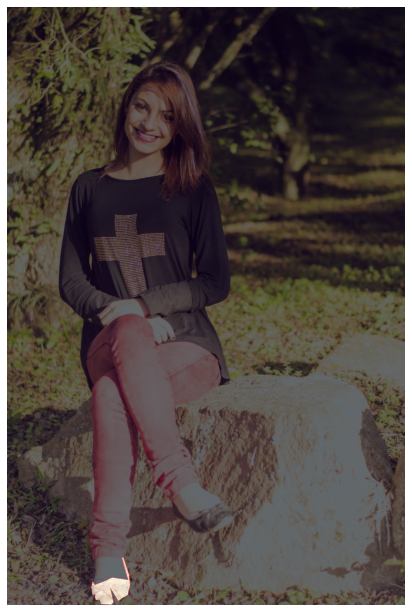

In [77]:
plot_individual_segment(masks[0], image=image)

# Plotting 2nd Segment: ClassId: "shoe"

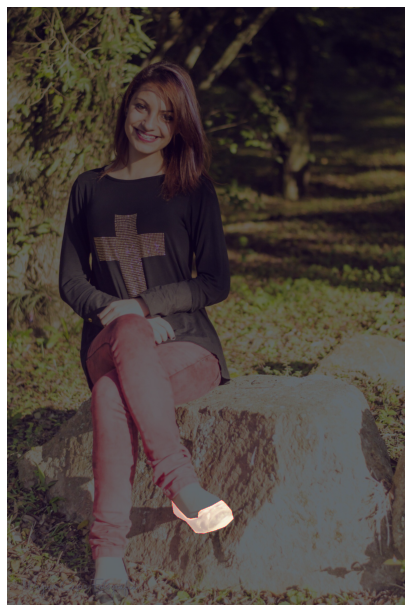

In [78]:
plot_individual_segment(masks[1], image=image)

# Plotting 3rd Segment with ClassId: "pants"

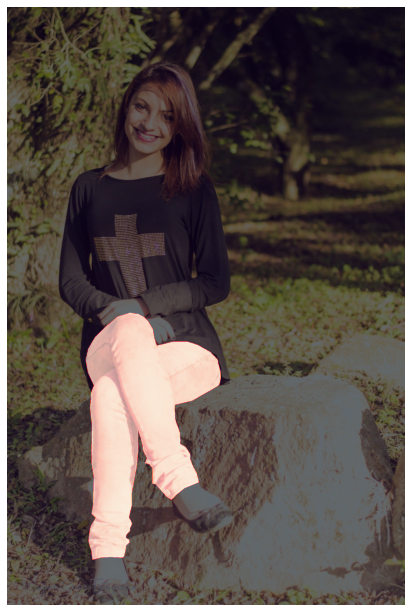

In [80]:
plot_individual_segment(masks[2], image=image)

# Plotting 4th Segment with ClassId: "top, t-shirt, sweatshirt"

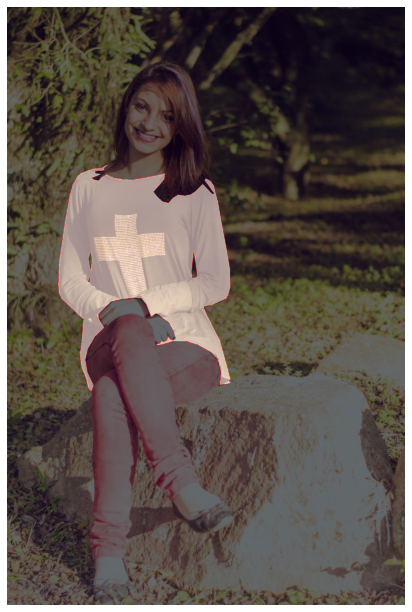

In [81]:
plot_individual_segment(masks[3], image=image)

Some of the segments have no attributes. Let's check how many such segment exists in training dataset.

In [82]:
print(f'Segments that do not have attributes: {train_df["AttributesIds"].isna().sum()/len(train_df) * 100} %')

Segments that do not have attributes: 38.089567817733 %


Let's check of missing values in training dataset for columns other than "AttributeIds"

In [84]:
train_df[['ImageId', 'EncodedPixels', 'Height', 'Width', 'ClassId']].isna().sum()

ImageId          0
EncodedPixels    0
Height           0
Width            0
ClassId          0
dtype: int64

# Data preparation

In [90]:
train_df = pd.read_csv('imaterialist-fashion-2020-fgvc7/train.csv')

In [91]:
#train_df['ClassId'] = train_df['ClassId'].cat.codes
train_df

ImageId  \
0       00000663ed1ff0c4e0132b9b9ac53f6e   
1       00000663ed1ff0c4e0132b9b9ac53f6e   
2       00000663ed1ff0c4e0132b9b9ac53f6e   
3       00000663ed1ff0c4e0132b9b9ac53f6e   
4       00000663ed1ff0c4e0132b9b9ac53f6e   
...                                  ...   
333396  fffe20b555b98c3c1f26c8dfff275cbc   
333397  ffffbf7014a9e408bfbb81a75bc70638   
333398  ffffbf7014a9e408bfbb81a75bc70638   
333399  ffffbf7014a9e408bfbb81a75bc70638   
333400  ffffbf7014a9e408bfbb81a75bc70638   

                                            EncodedPixels  Height  Width  \
0       6068157 7 6073371 20 6078584 34 6083797 48 608...    5214   3676   
1       6323163 11 6328356 32 6333549 53 6338742 75 63...    5214   3676   
2       8521389 10 8526585 30 8531789 42 8537002 46 85...    5214   3676   
3       12903854 2 12909064 7 12914275 10 12919485 15 ...    5214   3676   
4       10837337 5 10842542 14 10847746 24 10852951 33...    5214   3676   
...                                                   ...     ...    ...   
333396  2712731 8 2715725 23 2718719 39 2721713 55 272...    3000   2001   
333397  71179 1 71678 3 72178 4 72678 4 73178 5 73679 ...     500    375   
333398  116648 5 117148 16 117648 22 118148 26 118647 ...     500    375   
333399  67711 1 68210 1 68709 2 69204 2 69208 3 69705 ...     500    375   
333400  63365 36 63852 77 64343 85 64838 89 65332 94 6...     500    375   

        ClassId                    AttributesIds  
0             6  115,136,143,154,230,295,316,317  
1             0  115,136,142,146,225,295,316,317  
2            28                              163  
3            31                          160,204  
4            32                              219  
...         ...                              ...  
333396       28                              163  
333397       33                              NaN  
333398       31                              157  
333399       31                              157  
333400       10      102,128,142,150,295,308,317  

[333401 rows x 6 columns]

In [92]:
train_df.loc[:40]

ImageId  \
0   00000663ed1ff0c4e0132b9b9ac53f6e   
1   00000663ed1ff0c4e0132b9b9ac53f6e   
2   00000663ed1ff0c4e0132b9b9ac53f6e   
3   00000663ed1ff0c4e0132b9b9ac53f6e   
4   00000663ed1ff0c4e0132b9b9ac53f6e   
5   00000663ed1ff0c4e0132b9b9ac53f6e   
6   00000663ed1ff0c4e0132b9b9ac53f6e   
7   00000663ed1ff0c4e0132b9b9ac53f6e   
8   00000663ed1ff0c4e0132b9b9ac53f6e   
9   0000fe7c9191fba733c8a69cfaf962b7   
10  0000fe7c9191fba733c8a69cfaf962b7   
11  0002ec21ddb8477e98b2cbb87ea2e269   
12  0002ec21ddb8477e98b2cbb87ea2e269   
13  0002ec21ddb8477e98b2cbb87ea2e269   
14  0002ec21ddb8477e98b2cbb87ea2e269   
15  0002f5a0ebc162ecfb73e2c91e3b8f62   
16  0002f5a0ebc162ecfb73e2c91e3b8f62   
17  0002f5a0ebc162ecfb73e2c91e3b8f62   
18  0004467156e47b0eb6de4aa6479cbd15   
19  0004467156e47b0eb6de4aa6479cbd15   
20  0004467156e47b0eb6de4aa6479cbd15   
21  0004467156e47b0eb6de4aa6479cbd15   
22  0004467156e47b0eb6de4aa6479cbd15   
23  00048c3a2fb9c29340473c4cfc06424a   
24  00048c3a2fb9c29340473c4cfc06424a   
25  00048c3a2fb9c29340473c4cfc06424a   
26  00048c3a2fb9c29340473c4cfc06424a   
27  00048c3a2fb9c29340473c4cfc06424a   
28  00048c3a2fb9c29340473c4cfc06424a   
29  00048c3a2fb9c29340473c4cfc06424a   
30  00048c3a2fb9c29340473c4cfc06424a   
31  0006ea84499fd9a06fefbdf47a5eb4c0   
32  0006ea84499fd9a06fefbdf47a5eb4c0   
33  0006ea84499fd9a06fefbdf47a5eb4c0   
34  0006ea84499fd9a06fefbdf47a5eb4c0   
35  0006ea84499fd9a06fefbdf47a5eb4c0   
36  000775b6b5e27b011dc8bba2d7b85211   
37  000775b6b5e27b011dc8bba2d7b85211   
38  000775b6b5e27b011dc8bba2d7b85211   
39  000775b6b5e27b011dc8bba2d7b85211   
40  000775b6b5e27b011dc8bba2d7b85211   

                                        EncodedPixels  Height  Width  ClassId  \
0   6068157 7 6073371 20 6078584 34 6083797 48 608...    5214   3676        6   
1   6323163 11 6328356 32 6333549 53 6338742 75 63...    5214   3676        0   
2   8521389 10 8526585 30 8531789 42 8537002 46 85...    5214   3676       28   
3   12903854 2 12909064 7 12914275 10 12919485 15 ...    5214   3676       31   
4   10837337 5 10842542 14 10847746 24 10852951 33...    5214   3676       32   
5   11464158 10 11469372 30 11474586 43 11479800 4...    5214   3676       32   
6   5910568 31 5915775 65 5920982 69 5926189 73 59...    5214   3676       31   
7   6421446 292 6426657 298 6431867 305 6437078 31...    5214   3676       29   
8   4566382 8 4571592 25 4576803 41 4582013 58 458...    5214   3676        4   
9   2201176 1 2203623 3 2206071 5 2208518 8 221096...    2448   2448       33   
10  1343707 9 1346138 27 1348569 44 1351000 62 135...    2448   2448        1   
11  2673735 2 2676734 8 2679734 13 2682733 19 2685...    3000   1997       33   
12  2287509 4 2290504 12 2290588 26 2293501 18 229...    3000   1997       10   
13  3077799 43 3080792 52 3083786 60 3086779 70 30...    3000   1997       23   
14  2678617 8 2681610 18 2684607 25 2687605 31 269...    3000   1997       23   
15  435 132 1002 132 1569 132 2136 132 2703 132 32...     567    400       10   
16  107288 1 107854 3 108421 2 108987 3 109554 2 1...     567    400       33   
17  133262 2 133826 4 134390 6 134956 7 135522 7 1...     567    400       15   
18  132663 8 133396 25 134130 41 134868 53 135611 ...     750    500       10   
19  186967 3 187712 9 188457 15 189202 22 189950 2...     750    500       33   
20  241830 6 242576 16 243321 24 244066 29 244811 ...     750    500       31   
21  152573 1 153321 4 154069 7 154818 9 155566 12 ...     750    500       31   
22  192100 1 192849 4 193598 4 194347 4 195097 4 1...     750    500       15   
23  239016 3 239989 6 240963 7 241938 8 242913 9 2...     975    650       13   
24  257702 10 258670 26 259640 36 260572 6 260610 ...     975    650        1   
25  277152 1 278126 3 279102 2 280078 2 281053 3 2...     975    650       33   
26  249119 32 250083 44 251048 55 252016 64 252096...     975    650        8   
27  269630 2 270602 6 271574 9 272547 12 273519 14...     975    650       35   

In [93]:
categories_df

id                                     name   supercategory  level
0    0                            shirt, blouse       upperbody      2
1    1                 top, t-shirt, sweatshirt       upperbody      2
2    2                                  sweater       upperbody      2
3    3                                 cardigan       upperbody      2
4    4                                   jacket       upperbody      2
5    5                                     vest       upperbody      2
6    6                                    pants       lowerbody      2
7    7                                   shorts       lowerbody      2
8    8                                    skirt       lowerbody      2
9    9                                     coat       wholebody      2
10  10                                    dress       wholebody      2
11  11                                 jumpsuit       wholebody      2
12  12                                     cape       wholebody      2
13  13                                  glasses            head      2
14  14                                      hat            head      2
15  15  headband, head covering, hair accessory            head      2
16  16                                      tie            neck      2
17  17                                    glove  arms and hands      2
18  18                                    watch  arms and hands      2
19  19                                     belt           waist      2
20  20                               leg warmer   legs and feet      2
21  21                        tights, stockings   legs and feet      2
22  22                                     sock   legs and feet      2
23  23                                     shoe   legs and feet      2
24  24                              bag, wallet          others      2
25  25                                    scarf          others      2
26  26                                 umbrella          others      2
27  27                                     hood   garment parts      2
28  28                                   collar   garment parts      2
29  29                                    lapel   garment parts      2
30  30                                epaulette   garment parts      2
31  31                                   sleeve   garment parts      2
32  32                                   pocket   garment parts      2
33  33                                 neckline   garment parts      2
34  34                                   buckle        closures      2
35  35                                   zipper        closures      2
36  36                                 applique     decorations      2
37  37                                     bead     decorations      2
38  38                                      bow     decorations      2
39  39                                   flower     decorations      2
40  40                                   fringe     decorations      2
41  41                                   ribbon     decorations      2
42  42                                    rivet     decorations      2
43  43                                   ruffle     decorations      2
44  44                                   sequin     decorations      2
45  45                                   tassel     decorations      2

In [95]:
train_df_jacket = train_df[train_df['ClassId']==4]
train_df_jacket

ImageId  \
8       00000663ed1ff0c4e0132b9b9ac53f6e   
62      000c5bb8ca785bce8d00e3a6c7802a8c   
92      000e973c99dc090afd7898c93daf0dbc   
101     000e973c99dc090afd7898c93daf0dbc   
167     001d7807a696231045860eaee97e825b   
...                                  ...   
333242  ffe8150a195e3aaa72640d7730a811a1   
333302  fff11e31ec0146bd469e5e3afa14a37a   
333319  fff132f7ce55db363a1afc4fda330ffc   
333334  fff3ae4585d776922829ceb887789be4   
333383  fffe20b555b98c3c1f26c8dfff275cbc   

                                            EncodedPixels  Height  Width  \
8       4566382 8 4571592 25 4576803 41 4582013 58 458...    5214   3676   
62      322102 1 323125 2 324148 3 325171 4 326194 5 3...    1024    683   
92      4796962 5 4801882 14 4806801 24 4811721 33 481...    4928   3264   
101     2022977 2 2027903 8 2032828 14 2037754 19 2042...    4928   3264   
167     247017 4 248399 11 249780 16 251162 18 252543 ...    1383    900   
...                                                   ...     ...    ...   
333242  7279531 8 7283162 24 7286797 36 7290436 44 729...    3648   5472   
333302  195055 19 196068 56 197080 81 198092 94 199105...    1024    633   
333319  2005308 93 2008300 194 2011293 206 2014288 217...    3000   1997   
333334  98199 15 98221 27 98905 69 99620 79 100334 90 ...     720    480   
333383  2062254 2 2065252 8 2068250 13 2071208 29 2071...    3000   2001   

        ClassId                       AttributesIds  
8             4  17,115,136,145,149,225,295,311,317  
62            4             115,135,142,146,308,317  
92            4      17,115,136,142,146,295,316,328  
101           4                      28,136,295,317  
167           4     115,116,142,147,229,283,311,317  
...         ...                                 ...  
333242        4      17,136,142,146,225,295,308,328  
333302        4  17,115,136,142,148,225,295,311,317  
333319        4  17,115,136,142,147,225,295,311,322  
333334        4  21,115,136,142,146,225,295,298,317  
333383        4  17,115,136,142,147,225,295,311,322  

[7833 rows x 6 columns]